1. Capomulin appears to be significantly more successful at reducing tumor size and reducing metastic sites
2. The other drugs are all showing similar results or lack thereof
3. The survival rate for Capomulin is significantly better than the other three drugs 
4. We would still need to look at the other five drugs and the placebo to get a full picture of which drugs are the most effective at combating cancer

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_load = "data/mouse_drug_data.csv"
clinical_load = "data/clinicaltrial_data.csv"
mouse = pd.read_csv(mouse_load)
clinical = pd.read_csv(clinical_load)

# Read the Mouse and Drug Data and the Clinical Trial Data
# clinical.head()
# mouse.head()

# Combine the data into a single dataset
combined = pd.merge(clinical, mouse,
                                 how='inner', on='Mouse ID')
combined = combined.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume'})
# Display the data table for preview
combined.tail()

,Mouse ID,Timepoint,Tumor Volume,Metastatic Sites,Drug
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin
1905,m601,45,28.430964,1,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_group = combined.groupby(['Drug','Timepoint'])['Tumor Volume']
avg_tum = tumor_group.mean()

# Convert to DataFrame
avg_tum = avg_tum.reset_index()

# Preview DataFrame
avg_tum.tail()

,Drug,Timepoint,Tumor Volume
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692
99,Zoniferol,45,65.960888


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_err_tumor = tumor_group.sem()
# Convert to DataFrame
std_err_df = pd.DataFrame(std_err_tumor)
std_err_df = std_err_df.reset_index()
# Preview DataFrame
std_err_df.tail()

,Drug,Timepoint,Tumor Volume
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515
99,Zoniferol,45,1.003576


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tum_pivot = avg_tum.pivot(index='Timepoint', columns='Drug', values= 'Tumor Volume')
# Preview that Reformatting worked
tum_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


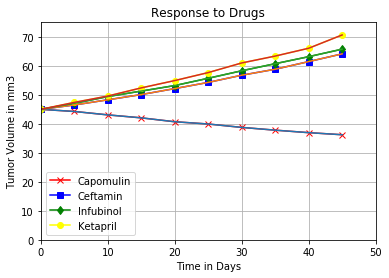

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate the Plot (with Error Bars)
ax = plt.gca
drug_list = []
plot_list = []
timepoint = tum_pivot['Capomulin'].keys()

for drugs in tum_pivot:
    drug_list.append(drugs)
for y in range(0, 4, 1):
    plot_list.append(drug_list[y])

plt.plot(timepoint, tum_pivot[plot_list[0]], color="red", marker='x', label=plot_list[0])
plt.plot(timepoint, tum_pivot[plot_list[1]], color="blue", marker='s', label=plot_list[1])
plt.plot(timepoint, tum_pivot[plot_list[2]], color="green", marker='d', label=plot_list[2])
plt.plot(timepoint, tum_pivot[plot_list[3]], color="yellow", marker='o', label=plot_list[3])
plt.errorbar(timepoint, tum_pivot[plot_list[0]], yerr=None, xerr=None, fmt='', ecolor=None, 
                           elinewidth=None, capsize=None, barsabove=False, 
                           lolims=False, uplims=False, xlolims=False, xuplims=False, 
                           errorevery=1, capthick=None, data=None)
plt.errorbar(timepoint, tum_pivot[plot_list[1]], yerr=None, xerr=None, fmt='', ecolor=None, 
                           elinewidth=None, capsize=None, barsabove=False, 
                           lolims=False, uplims=False, xlolims=False, xuplims=False, 
                           errorevery=1, capthick=None, data=None)
plt.errorbar(timepoint, tum_pivot[plot_list[2]], yerr=None, xerr=None, fmt='', ecolor=None, 
                           elinewidth=None, capsize=None, barsabove=False, 
                           lolims=False, uplims=False, xlolims=False, xuplims=False, 
                           errorevery=1, capthick=None, data=None)
plt.errorbar(timepoint, tum_pivot[plot_list[3]], yerr=None, xerr=None, fmt='', ecolor=None, 
                           elinewidth=None, capsize=None, barsabove=False, 
                           lolims=False, uplims=False, xlolims=False, xuplims=False, 
                           errorevery=1, capthick=None, data=None)

    
# Set the limits for the X and Y axes
plt.xlim(0,50)
plt.ylim(0,75)

plt.xlabel('Time in Days')
plt.ylabel('Tumor Volume in mm3')
plt.title('Response to Drugs')
plt.legend(loc='best')
plt.grid()
plt.show()
plt.savefig('../avg_tum_plot.png')

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_df = combined.groupby(['Drug','Timepoint'])['Metastatic Sites']
mean_met = met_df.mean()
# Convert to DataFrame
mean_met = mean_met.reset_index()
# Preview DataFrame
mean_met.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_err_met = met_df.sem()
# Convert to DataFrame
std_err_df2 = pd.DataFrame(std_err_met)
std_err_df2 = std_err_df2.reset_index()
# Preview DataFrame
std_err_df2.tail()

,Drug,Timepoint,Metastatic Sites
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791
99,Zoniferol,45,0.286400


In [8]:
# Minor Data Munging to Re-Format the Data Frames
met_pivot = std_err_df2.pivot(index='Timepoint', columns='Drug', values= 'Metastatic Sites')
# Preview that Reformatting worked
met_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


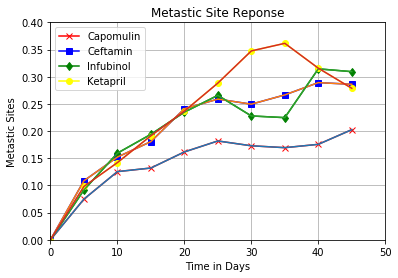

In [9]:
# Generate the Plot (with Error Bars)

plt.plot(timepoint, met_pivot[plot_list[0]], color="red", marker='x', label=plot_list[0])
plt.plot(timepoint, met_pivot[plot_list[1]], color="blue", marker='s', label=plot_list[1])
plt.plot(timepoint, met_pivot[plot_list[2]], color="green", marker='d', label=plot_list[2])
plt.plot(timepoint, met_pivot[plot_list[3]], color="yellow", marker='o', label=plot_list[3])
plt.errorbar(timepoint, met_pivot[plot_list[0]], yerr=None, xerr=None, fmt='', ecolor=None, 
                           elinewidth=None, capsize=None, barsabove=False, 
                           lolims=False, uplims=False, xlolims=False, xuplims=False, 
                           errorevery=1, capthick=None, data=None)
plt.errorbar(timepoint, met_pivot[plot_list[1]], yerr=None, xerr=None, fmt='', ecolor=None, 
                           elinewidth=None, capsize=None, barsabove=False, 
                           lolims=False, uplims=False, xlolims=False, xuplims=False, 
                           errorevery=1, capthick=None, data=None)
plt.errorbar(timepoint, met_pivot[plot_list[2]], yerr=None, xerr=None, fmt='', ecolor=None, 
                           elinewidth=None, capsize=None, barsabove=False, 
                           lolims=False, uplims=False, xlolims=False, xuplims=False, 
                           errorevery=1, capthick=None, data=None)
plt.errorbar(timepoint, met_pivot[plot_list[3]], yerr=None, xerr=None, fmt='', ecolor=None, 
                           elinewidth=None, capsize=None, barsabove=False, 
                           lolims=False, uplims=False, xlolims=False, xuplims=False, 
                           errorevery=1, capthick=None, data=None)

# Set the limits for the X and Y axes
plt.xlim(0, 50)
plt.ylim(0, 0.4)

plt.xlabel('Time in Days')
plt.ylabel('Metastic Sites')
plt.title('Metastic Site Reponse')
plt.legend(loc='best')
plt.grid()
plt.savefig('../metastic_plot.png')

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_group = combined.groupby(['Drug','Timepoint'])['Mouse ID']
mice_df = mice_group.nunique()

# Convert to DataFrame
mice_df = mice_df.reset_index()
mice_df = mice_df.rename(columns={'Mouse ID':'Mice Count'})
# Preview DataFrame
mice_df.head()

,Drug,Timepoint,Mice Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mice_pivot = mice_df.pivot(index='Timepoint', columns='Drug')
# Preview that Reformatting worked
mice_pivot.tail()

Mice Count                                                        \
Drug       Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                    
25                22       18        18       19       18      17       14   
30                22       16        17       18       15      15       13   
35                22       14        12       17       15      14       10   
40                21       14        10       15       15      12        9   
45                21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

In [12]:
mice_pivot = mice_pivot.reset_index()
mice_pivot

Timepoint Mice Count                                               \
Drug            Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo   
0            0         25       25        25       25       25      25   
1            5         25       21        25       23       23      24   
2           10         25       20        21       22       21      24   
3           15         24       19        21       19       21      20   
4           20         23       18        20       19       20      19   
5           25         22       18        18       19       18      17   
6           30         22       16        17       18       15      15   
7           35         22       14        12       17       15      14   
8           40         21       14        10       15       15      12   
9           45         21       13         9       11       13      11   

                                           
Drug Propriva Ramicane Stelasyn Zoniferol  
0          25       25       25        25  
1          24       25       24        24  
2          22       24       22        22  
3          16       24       22        21  
4          16       23       20        17  
5          14       23       19        16  
6          13       23       18        15  
7          10       21       16        14  
8           9       20       12        14  
9           7       20       11        14

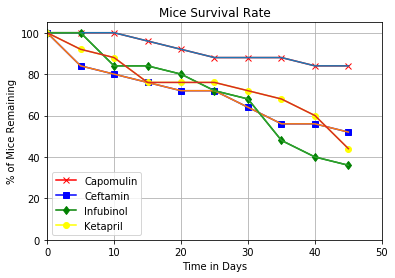

<Figure size 432x288 with 0 Axes>

In [36]:
# Generate the Plot (Accounting for percentages)
mice_pct = mice_pivot['Mice Count'] / 25 * 100

plt.plot(timepoint, mice_pct[plot_list[0]], color="red", marker='x', label=plot_list[0])
plt.plot(timepoint, mice_pct[plot_list[1]], color="blue", marker='s', label=plot_list[1])
plt.plot(timepoint, mice_pct[plot_list[2]], color="green", marker='d', label=plot_list[2])
plt.plot(timepoint, mice_pct[plot_list[3]], color="yellow", marker='o', label=plot_list[3])
plt.errorbar(timepoint, mice_pct[plot_list[0]], yerr=None, xerr=None, fmt='', ecolor=None, 
                           elinewidth=None, capsize=None, barsabove=False, 
                           lolims=False, uplims=False, xlolims=False, xuplims=False, 
                           errorevery=1, capthick=None, data=None)
plt.errorbar(timepoint, mice_pct[plot_list[1]], yerr=None, xerr=None, fmt='', ecolor=None, 
                           elinewidth=None, capsize=None, barsabove=False, 
                           lolims=False, uplims=False, xlolims=False, xuplims=False, 
                           errorevery=1, capthick=None, data=None)
plt.errorbar(timepoint, mice_pct[plot_list[2]], yerr=None, xerr=None, fmt='', ecolor=None, 
                           elinewidth=None, capsize=None, barsabove=False, 
                           lolims=False, uplims=False, xlolims=False, xuplims=False, 
                           errorevery=1, capthick=None, data=None)
plt.errorbar(timepoint, mice_pct[plot_list[3]], yerr=None, xerr=None, fmt='', ecolor=None, 
                           elinewidth=None, capsize=None, barsabove=False, 
                           lolims=False, uplims=False, xlolims=False, xuplims=False, 
                           errorevery=1, capthick=None, data=None)
    
# Set the limits for the X and Y axes
plt.xlim(0, 50)
plt.ylim(0, 105)

plt.xlabel('Time in Days')
plt.ylabel('% of Mice Remaining')
plt.title('Mice Survival Rate')
plt.legend(loc='best')
plt.grid()
plt.show()
plt.savefig('../mice_count_plot.png')

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [37]:
# Calculate the percent changes for each drug
prct_chg = []
for x in plot_list:
    prct_chg.append((tum_pivot[x][45] - tum_pivot[x][0]) / tum_pivot[x][0] * 100)
prct_final = pd.DataFrame({'Drug': plot_list, 'Percent Change': prct_chg})
# prct_final.set_index('Drug')
prct_final

,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795


In [41]:
pct_tuple = prct_final.loc[[plot_list[0], plot_list[1], plot_list[2], plot_list[3]]

# Splice the data between passing and failing drugs
last_plot = plt.subplots()
x_axis = np.arange(0, len(prct_tuple))
                           
ticks = []
for x in x_axis:
    ticks.append(x + 0.5)
plt.xticks(ticks, pct_tuple)
                           
for value in percentchange_tumorvolume:
    if value >= 0:
        colors.append('r')
    else:
        colors.append('g')
                           
final_pct = pct_tuple.bar(x_axis, pct_tuple, color=colors, align="edge")


# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('Tumor Volume Change by %')
ax.set_title('Reponse to Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels('plot_list')
ax.set_autoscaley_on(False)
plt.xlim(-0.25, len(plot_list))
ax.set_ylim([-25,60])
ax.grid(True)

# Use functions to label the percentages of changes
def fail_label(shapes):
    for shape in shapes:
        height = shape.get_height()
        ax.text(shape.get_x() + shape.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def pass_label(shapes):
    for shape in shapes:
        height = shape.get_height()
        ax.text(shape.get_x() + shape.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
pass_label(drug_pass)
fail_label(drug_fail)

# Save the Figure
fig.savefig('../total_chg.png')

# Show the Figure
fig.show()

SyntaxError: invalid syntax (<ipython-input-41-9e0fa8b29be4>, line 4)

![Metastatic Spread During Treatment](../Images/change.png)